<a href="https://www.kaggle.com/code/mikedelong/yes-there-are-ugly-pie-charts?scriptVersionId=138721468" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[1])

# drop columns that are redundant or almost always NaN
drop_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO',
                'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'LANE_CNT', 'LOCATION', 
               ]
nrows = 746498 // 10 # for performance reasons we take about 10%
filepath_or_buffer='../input/chicago-car-crash-dataset/Traffic_Crashes_-_Crashes.csv'
df = pd.read_csv(filepath_or_buffer=filepath_or_buffer, 
                 nrows=nrows, 
                 parse_dates=['CRASH_DATE', 'DATE_POLICE_NOTIFIED'], 
                ).drop(columns=drop_columns)

df.sample(n=7).sort_values(by='CRASH_DATE', ascending=False)

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
38274,2020-12-07 11:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,...,0.0,0.0,0.0,1.0,0.0,11,2,12,41.957465,-87.654132
29693,2019-09-11 17:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,17,4,9,41.779022,-87.706890
21052,2019-06-07 14:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,14,6,6,41.930553,-87.643649
12894,2018-08-25 12:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,OTHER OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,...,0.0,0.0,0.0,1.0,0.0,12,7,8,41.982613,-87.779366
21457,2017-12-04 15:30:00,30,NO CONTROLS,MISSING,CLOUDY/OVERCAST,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,15,2,12,41.808412,-87.673410
48285,2016-11-20 19:25:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,19,1,11,41.798354,-87.796772
48263,2016-08-02 07:25:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,7,3,8,42.015610,-87.664794


Note that sorting a sample by crash date does not put the records in index order.

In [2]:
df.shape

(74649, 37)

We have three quarters of a million rows in the whole dataset so we need to be careful when plotting the whole set, or we use a sample.

In [3]:
# get the dypes and nan counts in a single cell
pd.concat([df.dtypes.rename('dtypes'), df.isna().sum().rename('nan_count')], axis=1).reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
index,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
dtypes,datetime64[ns],int64,object,object,object,object,object,object,object,object,...,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
nan_count,0,0,0,0,0,0,0,0,0,0,...,238,238,238,238,238,0,0,0,707,707


<Axes: xlabel='CRASH_DATE'>

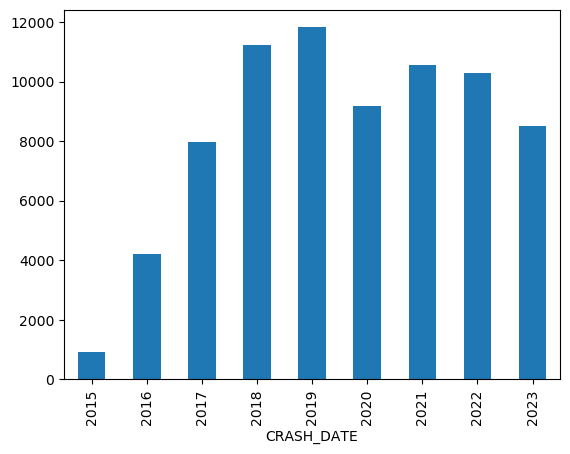

In [4]:
# when we ask for nrows are we getting a random sample?
df.groupby(df['CRASH_DATE'].dt.year).size().plot(kind='bar')

It's probably a good idea to see the year distribution for the whole dataset before making any decisions.

<Axes: ylabel='Frequency'>

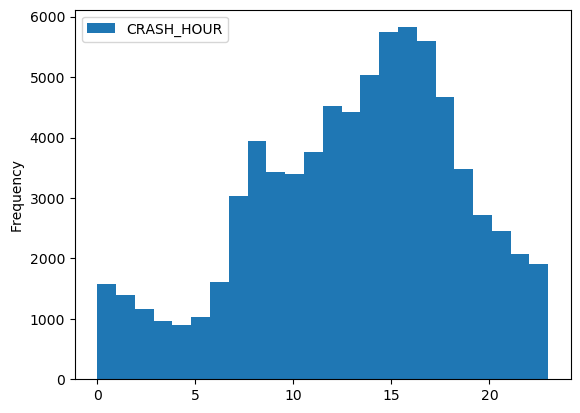

In [5]:
# crashes peak during rush hour
df[['CRASH_HOUR']].plot.hist(bins=24, legend=True)

<Axes: ylabel='Frequency'>

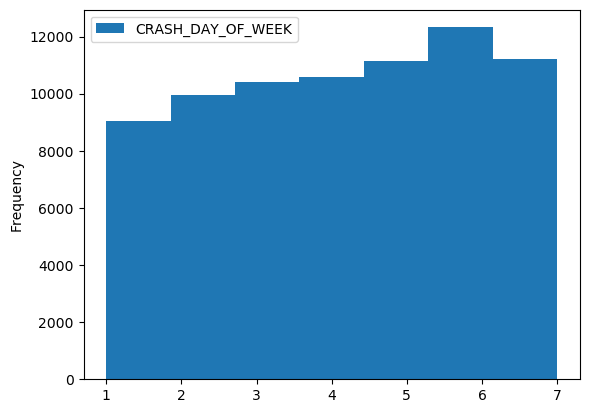

In [6]:
# going to guess 
df[['CRASH_DAY_OF_WEEK']].plot.hist(bins=7, legend=True)

<Axes: ylabel='Frequency'>

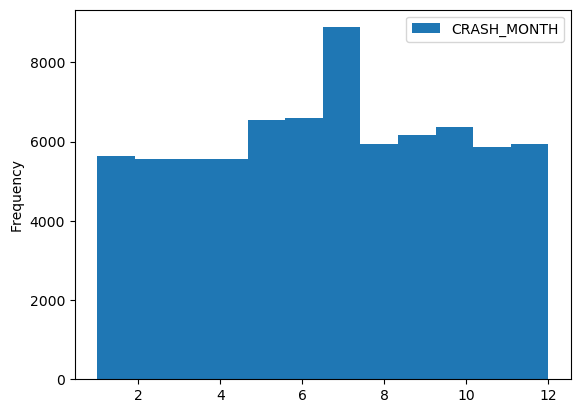

In [7]:
df[['CRASH_MONTH']].plot.hist(bins=12, legend=True)

<Axes: ylabel='INJURIES_TOTAL'>

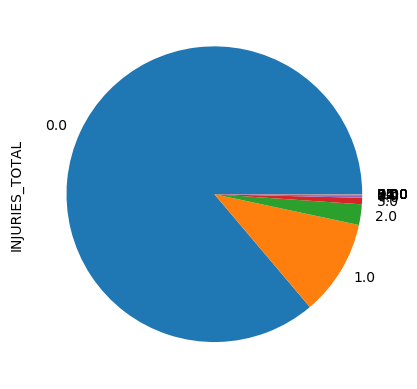

In [8]:
df['INJURIES_TOTAL'].value_counts().plot(kind='pie')

<Axes: ylabel='POSTED_SPEED_LIMIT'>

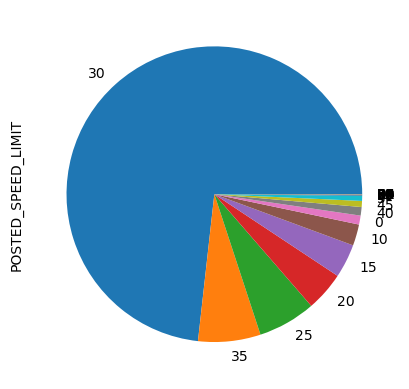

In [9]:
df['POSTED_SPEED_LIMIT'].value_counts().plot(kind='pie')

We have some outliers; are they sensible?

In [10]:
df[(df['POSTED_SPEED_LIMIT'] < 10) | (df['POSTED_SPEED_LIMIT'] > 55)]['POSTED_SPEED_LIMIT'].value_counts()

0     730
5     404
3      14
9       6
60      5
99      4
1       4
65      3
6       1
Name: POSTED_SPEED_LIMIT, dtype: int64

<Axes: ylabel='Frequency'>

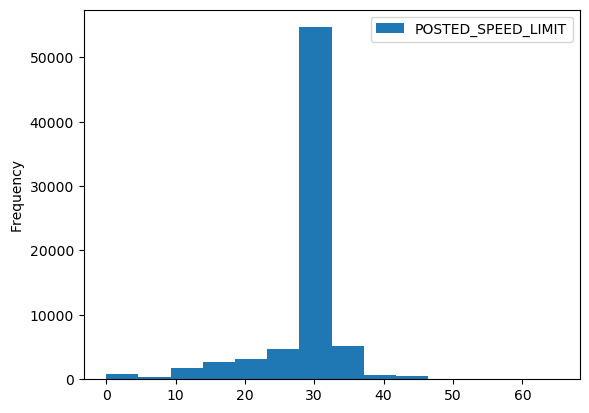

In [11]:
df[df['POSTED_SPEED_LIMIT'] < 66]['POSTED_SPEED_LIMIT'].plot.hist(bins=14, legend=True)

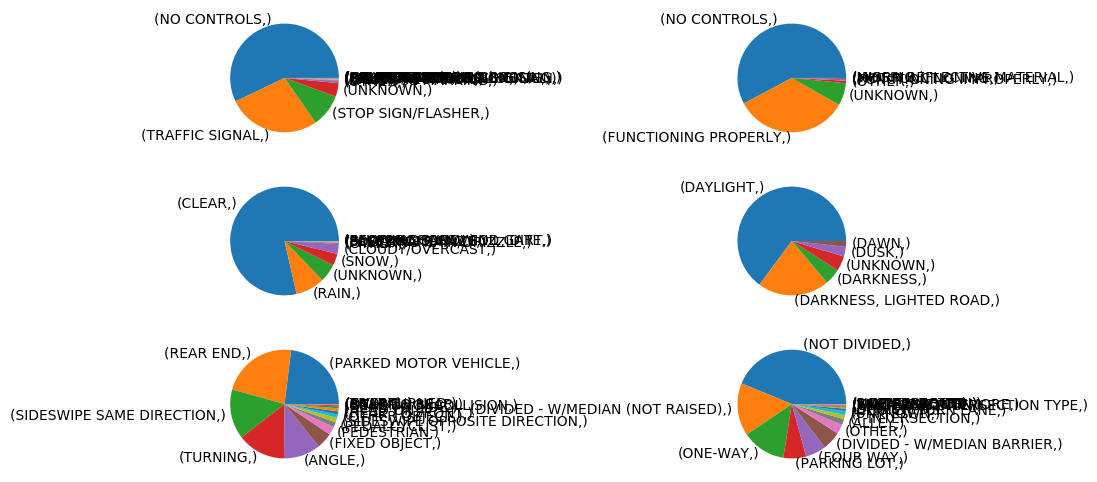

In [12]:
# let's make all of our ugly pie charts at once
from matplotlib.pyplot import subplots
pie_columns = [ 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE'	]

fig, ax = subplots(3, 2, figsize=(12, 6))
for index, axis in enumerate(ax.flatten()):
    df[[pie_columns[index]]].value_counts().plot(kind='pie', ax=axis, )

<Axes: >

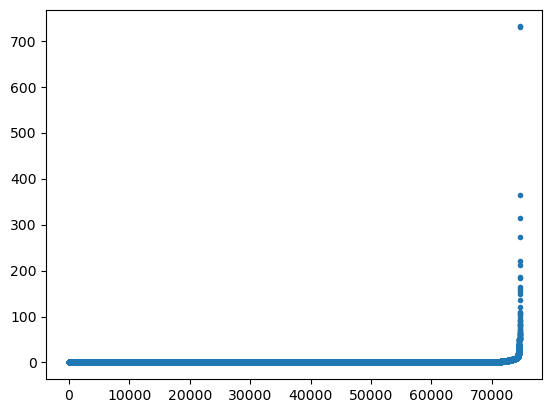

In [13]:
# most of the time but not always the time between the crash and the time it is reported is negligible
df['reporting_delay'] = (df['DATE_POLICE_NOTIFIED'] - df['CRASH_DATE']).dt.days
df[['reporting_delay']].sort_values(by='reporting_delay').reset_index()['reporting_delay'].plot(kind='line', linestyle='none', marker='.')

<Axes: xlabel='CRASH_DAY_OF_WEEK,CRASH_HOUR'>

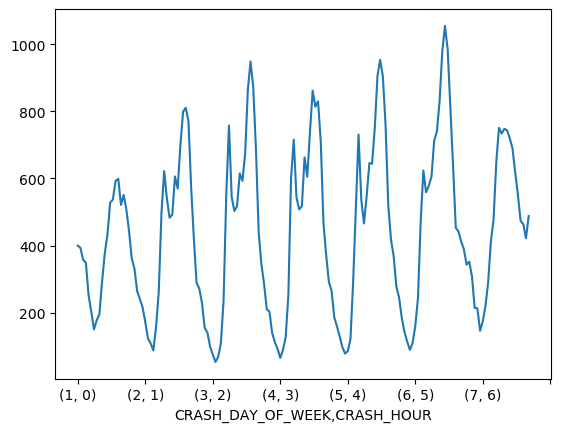

In [14]:
# day and hour chart
time_columns = ['CRASH_DAY_OF_WEEK', 'CRASH_HOUR'] 
df.groupby(by=time_columns).size().plot()

As expected crashes have rush hour modes during the week. Maybe a heatmap would be better.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='CRASH_HOUR', ylabel='CRASH_DAY_OF_WEEK'>

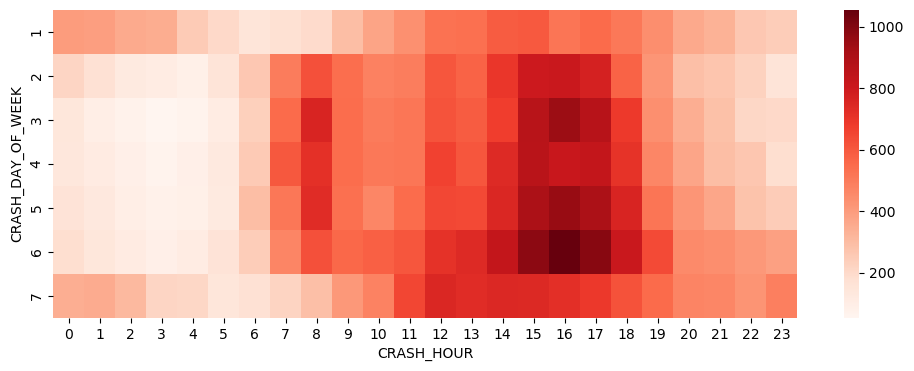

In [15]:
from seaborn import heatmap
from matplotlib.pyplot import figure
figure(figsize=(12, 4))
heatmap(data=df.groupby(by=time_columns).size().to_frame(name='count').reset_index().pivot(columns=time_columns[1],
                                                                                           index=time_columns[0],
                                                                                           values='count'),
       square=False, cmap='Reds')